In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import isodate
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv(r'C:\Users\USER\MyProjects\Analytics\YoutubeScrap\kenyan_youtube_data.csv')
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,channelName,subscribers,views,totalVideos,playlistId
0,bMECgLgBvEg,Prince Indah,Prince Indah - Nyar Jaduong (Official Video),Enjoy Prince Indah's first release of 2024 'Ny...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-03-03T12:00:09Z,6888344,63418.0,NaN,7863.0,PT8M38S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA
1,c7gdO8V4VDE,Prince Indah,Prince Indah - Nyar Jaduong (Official Trailer),Now Out! Stream Here - https://ziiki.media/Nya...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-28T09:01:23Z,287549,3431.0,NaN,202.0,PT26S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA
2,_NqNg4iSE2M,Prince Indah,Prince Indah - Puonj Mag Dak Jukebox,"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-19T17:20:07Z,446125,2380.0,NaN,200.0,PT1H28M56S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA
3,rOeMGVqtu6I,Prince Indah,MALAIKA MUSICALS FESTIVAL AT JOMO KENYATTA STA...,NaN,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-09-22T12:09:31Z,445559,3237.0,NaN,372.0,PT3H15M12S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA
4,sBdpjpgRWLw,Prince Indah,Prince Indah - Mummy Chulo (Official Lyric Video),"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10T17:21:49Z,1300069,5904.0,NaN,569.0,PT10M9S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,fu_bOwPPkPg,Wanavokali,2 in 1 - Naiboi (WANAVOKALI Cover),Wanavokali covers 2 in 1 by the one and only N...,"['wanavokali', 'naiboi', 'vocalists', 'muscian...",2019-07-30T09:48:04Z,13585,316.0,NaN,12.0,PT1M,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA
10122,JWE5my57adM,Wanavokali,Nviiri The Storyteller X WANAVOKALI - Pombe Si...,#wanavokali teamed up with Nviiri the Storytel...,"['sauti', 'sautisol', 'sol generation', 'nviir...",2019-07-23T08:50:39Z,47049,1530.0,NaN,32.0,PT1M3S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA
10123,PURnxA02pKE,Wanavokali,Nameless- Salari (WANAVOKALI Cover),#wanavokali here! This is our rendition of Sal...,"['wanavokali', 'vokali', 'nameless', 'salari',...",2019-07-16T23:00:19Z,8928,251.0,NaN,13.0,PT46S,sd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA
10124,tODe83D18vo,Wanavokali,Nyashinski- Malaika (WANAVOKALI Cover),#wanavokali at it again! This is our short ren...,"['wanavokali', 'nyashinski', 'malaika', 'love'...",2019-07-16T22:41:53Z,35425,983.0,NaN,27.0,PT1M1S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA


The publishedAt column has string date and time, we convert it to actual datetime
We get the exact day of week each video is published

In [65]:
df['publishedAt'] =  df['publishedAt'].apply(lambda x: parser.parse(x)) #to a datetime data type
df['publishDayName'] = df['publishedAt'].apply(lambda x: x.strftime("%A")) #to day of week


The duration column has a string type format so we change to seconds, as a timedelta object

In [66]:
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'] .astype('timedelta64[s]')
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,channelName,subscribers,views,totalVideos,playlistId,publishDayName,durationSecs
0,bMECgLgBvEg,Prince Indah,Prince Indah - Nyar Jaduong (Official Video),Enjoy Prince Indah's first release of 2024 'Ny...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-03-03 12:00:09+00:00,6888344,63418.0,NaN,7863.0,PT8M38S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Sunday,518.0
1,c7gdO8V4VDE,Prince Indah,Prince Indah - Nyar Jaduong (Official Trailer),Now Out! Stream Here - https://ziiki.media/Nya...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-28 09:01:23+00:00,287549,3431.0,NaN,202.0,PT26S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,26.0
2,_NqNg4iSE2M,Prince Indah,Prince Indah - Puonj Mag Dak Jukebox,"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-19 17:20:07+00:00,446125,2380.0,NaN,200.0,PT1H28M56S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Monday,5336.0
3,rOeMGVqtu6I,Prince Indah,MALAIKA MUSICALS FESTIVAL AT JOMO KENYATTA STA...,NaN,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-09-22 12:09:31+00:00,445559,3237.0,NaN,372.0,PT3H15M12S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Friday,11712.0
4,sBdpjpgRWLw,Prince Indah,Prince Indah - Mummy Chulo (Official Lyric Video),"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 17:21:49+00:00,1300069,5904.0,NaN,569.0,PT10M9S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,fu_bOwPPkPg,Wanavokali,2 in 1 - Naiboi (WANAVOKALI Cover),Wanavokali covers 2 in 1 by the one and only N...,"['wanavokali', 'naiboi', 'vocalists', 'muscian...",2019-07-30 09:48:04+00:00,13585,316.0,NaN,12.0,PT1M,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,60.0
10122,JWE5my57adM,Wanavokali,Nviiri The Storyteller X WANAVOKALI - Pombe Si...,#wanavokali teamed up with Nviiri the Storytel...,"['sauti', 'sautisol', 'sol generation', 'nviir...",2019-07-23 08:50:39+00:00,47049,1530.0,NaN,32.0,PT1M3S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,63.0
10123,PURnxA02pKE,Wanavokali,Nameless- Salari (WANAVOKALI Cover),#wanavokali here! This is our rendition of Sal...,"['wanavokali', 'vokali', 'nameless', 'salari',...",2019-07-16 23:00:19+00:00,8928,251.0,NaN,13.0,PT46S,sd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,46.0
10124,tODe83D18vo,Wanavokali,Nyashinski- Malaika (WANAVOKALI Cover),#wanavokali at it again! This is our short ren...,"['wanavokali', 'nyashinski', 'malaika', 'love'...",2019-07-16 22:41:53+00:00,35425,983.0,NaN,27.0,PT1M1S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,61.0


In [67]:
df.isnull().any()

video_id          False
channelTitle      False
title             False
description        True
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
channelName        True
subscribers        True
views              True
totalVideos        True
playlistId         True
publishDayName    False
durationSecs      False
dtype: bool

favouritecount column is statistically irrelevant

In [68]:
df.drop(columns=['favouriteCount'], inplace=True)

Replacing channel titles to match, for better analysis

In [69]:
df = df.copy()
df.loc[:, 'channelTitle'] = df['channelTitle'].replace({
    'ChrisKaigaVEVO': 'Chris Kaiga',
    'VictoriaKimaniVEVO': 'Victoria Kimani',
    'SautiSolVEVO': 'Sauti Sol',
    'EthicEntVEVO': 'Ethic Entertainment',
    'NikitaKeringVEVO': 'Nikita Kering\''
})
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,channelName,subscribers,views,totalVideos,playlistId,publishDayName,durationSecs
0,bMECgLgBvEg,Prince Indah,Prince Indah - Nyar Jaduong (Official Video),Enjoy Prince Indah's first release of 2024 'Ny...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-03-03 12:00:09+00:00,6888344,63418.0,7863.0,PT8M38S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Sunday,518.0
1,c7gdO8V4VDE,Prince Indah,Prince Indah - Nyar Jaduong (Official Trailer),Now Out! Stream Here - https://ziiki.media/Nya...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-28 09:01:23+00:00,287549,3431.0,202.0,PT26S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,26.0
2,_NqNg4iSE2M,Prince Indah,Prince Indah - Puonj Mag Dak Jukebox,"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-19 17:20:07+00:00,446125,2380.0,200.0,PT1H28M56S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Monday,5336.0
3,rOeMGVqtu6I,Prince Indah,MALAIKA MUSICALS FESTIVAL AT JOMO KENYATTA STA...,NaN,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-09-22 12:09:31+00:00,445559,3237.0,372.0,PT3H15M12S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Friday,11712.0
4,sBdpjpgRWLw,Prince Indah,Prince Indah - Mummy Chulo (Official Lyric Video),"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 17:21:49+00:00,1300069,5904.0,569.0,PT10M9S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,fu_bOwPPkPg,Wanavokali,2 in 1 - Naiboi (WANAVOKALI Cover),Wanavokali covers 2 in 1 by the one and only N...,"['wanavokali', 'naiboi', 'vocalists', 'muscian...",2019-07-30 09:48:04+00:00,13585,316.0,12.0,PT1M,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,60.0
10122,JWE5my57adM,Wanavokali,Nviiri The Storyteller X WANAVOKALI - Pombe Si...,#wanavokali teamed up with Nviiri the Storytel...,"['sauti', 'sautisol', 'sol generation', 'nviir...",2019-07-23 08:50:39+00:00,47049,1530.0,32.0,PT1M3S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,63.0
10123,PURnxA02pKE,Wanavokali,Nameless- Salari (WANAVOKALI Cover),#wanavokali here! This is our rendition of Sal...,"['wanavokali', 'vokali', 'nameless', 'salari',...",2019-07-16 23:00:19+00:00,8928,251.0,13.0,PT46S,sd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,46.0
10124,tODe83D18vo,Wanavokali,Nyashinski- Malaika (WANAVOKALI Cover),#wanavokali at it again! This is our short ren...,"['wanavokali', 'nyashinski', 'malaika', 'love'...",2019-07-16 22:41:53+00:00,35425,983.0,27.0,PT1M1S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,61.0


In [70]:
#filter through columns and rows before and after updates of each to confirm results
filter_df = df[df['channelName']== 'Ethic Entertainment']
filter_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,channelName,subscribers,views,totalVideos,playlistId,publishDayName,durationSecs
1776,oRjtVPYrgPk,Ethic Entertainment,Ethic Entertainment x Bien - Back it up,Ethic alongside Bien teamed up on this party s...,"['#ethic entertainment #Bien #Sauti Sol', '#ge...",2024-08-13 14:00:26+00:00,14278,1547.0,145.0,PT2M58S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Tuesday,178.0
1777,MQAIfnZe60w,Ethic Entertainment,XXX LYRICS VIDEO,XXX is a track performed by ethic entertainmen...,['#arbantone #tipsygee #seanmmg #ybwsmith #lil...,2024-07-29 14:30:27+00:00,324180,1149.0,213.0,PT3M48S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Monday,228.0
1780,u5EH6yPPHF4,Ethic Entertainment,#newmusic 🔥🔥🔥#pressure #ethicentertainment,NaN,NaN,2024-05-10 15:55:44+00:00,1223,120.0,6.0,PT21S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Friday,21.0
1781,8qkL7V3jXzw,Ethic Entertainment,Ethic Entertainment - Amigos (Official Video),'Amigos' out now: https://UMGKE.lnk.to/AmigosI...,NaN,2024-03-29 14:28:07+00:00,111981,6306.0,534.0,PT3M12S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Friday,192.0
1784,OccIXq85c1Y,Ethic Entertainment,Ethic entertainment - Bizz ni Bizz [SMS SKIZA ...,FOLLOW ETHIC ON \n\nINSTAGRAM : https://www.in...,NaN,2022-02-15 13:00:10+00:00,305661,8941.0,461.0,PT3M52S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Tuesday,232.0
1785,OHRyjjMjghs,Ethic Entertainment,ETHIC entertainment - Mimi ft Zikki [SMS SKIZA...,FOLLOW ETHIC ON \n\nINSTAGRAM : https://www.in...,NaN,2021-12-03 15:00:10+00:00,396910,11232.0,534.0,PT2M54S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Friday,174.0
1786,r8Tt9bDTuZo,Ethic Entertainment,Ethic Entertainment-Fanya [SMS SKIZA 6620367 t...,FOLLOW ETHIC ON \n\nINSTAGRAM : https://www.in...,NaN,2021-09-17 08:00:10+00:00,505204,14085.0,778.0,PT2M54S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Friday,174.0
1787,8yovEAmRBRU,Ethic Entertainment,BAZENGA-ETHIC ENTERTAINMENT [OFFICIAL VIDEO] [...,FOLLOW ETHIC ON \n\nINSTAGRAM : https://www.in...,NaN,2021-06-18 13:00:10+00:00,1429507,31570.0,1613.0,PT2M50S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Friday,170.0
1788,TFGuFLd_Ii8,Ethic Entertainment,BAZENGA/Ethic entertainment..dropping tomorrow...,NaN,NaN,2021-06-17 05:25:23+00:00,43521,2298.0,84.0,PT24S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Thursday,24.0
1789,hyivkv8oH5A,Ethic Entertainment,STYLO|SESKA X KIDIS X CL n SHEI DI,Ethic entertainment is under Jack Stark manage...,NaN,2021-05-24 17:00:15+00:00,169014,4759.0,248.0,PT2M30S,hd,False,Ethic Entertainment,391000.0,53570517.0,33.0,UUOEK9oW_VYDHbX3qwT4JMyQ,Monday,150.0


Here is one way to clean/ update and replace one row at a time

In [71]:
df.loc[df['channelTitle'].isin(['Ssaru', 'SaruVEVO']), ['channelName', 'subscribers']] = ['Ssaru', 129000.0]
df['channelTitle'] = df['channelTitle'].replace({'SaruVEVO': 'Ssaru'})

Here we update multiple channeltitles, matching them to their respective channelnames and subscribers, to fill out the blanks

In [72]:
updates = {
    'Sauti Sol': ('Sauti Sol', '1110000.0'),
    'Chris Kaiga': ('Chris Kaiga', '95600.0'),
    'Victoria Kimani': ('Victoria Kimani', '74300.0'),
    'Ethic Entertainment': ('Ethic Entertainment', '391000.0'),
    'Nikita Kering\'': ('Nikita Kering\'', '222000.0')
}

for channeltitle, (name, subs) in updates.items():
    df.loc[df['channelTitle'] == channeltitle, ['channelName', 'subscribers']] = [name, subs]

updating and matching each channels's video informations; totalvidoes'count and playlist ID

In [73]:
updates_videos = {
    'Ssaru': ('7767233', '39.0', 'UU7dCFKu_W8-veV354axaPOg'),
    'Victoria Kimani': ('13620990', '122.0', 'UUcegJZ-0FZcby0gsI4LAnGg'),
    'Chris Kaiga': ('15061599', '10.0', 'UUsmPEw8gG-tmNJn_UzKwcWA'),
    'Sauti Sol': ('343198952', '258.0', 'UUBZPPYU_l99Mg6-GXm6xbMg'),
    'Nikita Kering\'': ('18330388', '20.0', 'UUl1txXouaN3YU8zzNPJP_pA'),
    'Ethic Entertainment': ('53570517', '33.0', 'UUOEK9oW_VYDHbX3qwT4JMyQ')
}

for channeltitle, (Views, totalvideos, playlistID) in updates_videos.items():
    df.loc[df['channelTitle'] == channeltitle, ['views', 'totalVideos', 'playlistId']] = [Views, totalvideos, playlistID]

In [74]:
#since no common tags are available for most channels, we replace the blanks like
df = df.copy()
df[['description', 'tags']] = df[['description', 'tags']].fillna({
    'description': 'No Description Available',
    'tags': 'No Tags'
})

In [75]:
median_like = df.groupby('channelTitle')['likeCount'].transform('median')
median_comment = df.groupby('channelTitle')['commentCount'].transform('median')

# Fill null values in viewCount and commentCount with the respective medians
df['likeCount'].fillna(median_like, inplace=True)
df['commentCount'].fillna(median_comment, inplace=True)

In [80]:
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,channelName,subscribers,views,totalVideos,playlistId,publishDayName,durationSecs
0,bMECgLgBvEg,Prince Indah,Prince Indah - Nyar Jaduong (Official Video),Enjoy Prince Indah's first release of 2024 'Ny...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-03-03 12:00:09+00:00,6888344,63418.0,7863.0,PT8M38S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Sunday,518.0
1,c7gdO8V4VDE,Prince Indah,Prince Indah - Nyar Jaduong (Official Trailer),Now Out! Stream Here - https://ziiki.media/Nya...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-28 09:01:23+00:00,287549,3431.0,202.0,PT26S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,26.0
2,_NqNg4iSE2M,Prince Indah,Prince Indah - Puonj Mag Dak Jukebox,"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-19 17:20:07+00:00,446125,2380.0,200.0,PT1H28M56S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Monday,5336.0
3,rOeMGVqtu6I,Prince Indah,MALAIKA MUSICALS FESTIVAL AT JOMO KENYATTA STA...,No Description Available,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-09-22 12:09:31+00:00,445559,3237.0,372.0,PT3H15M12S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Friday,11712.0
4,sBdpjpgRWLw,Prince Indah,Prince Indah - Mummy Chulo (Official Lyric Video),"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 17:21:49+00:00,1300069,5904.0,569.0,PT10M9S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,fu_bOwPPkPg,Wanavokali,2 in 1 - Naiboi (WANAVOKALI Cover),Wanavokali covers 2 in 1 by the one and only N...,"['wanavokali', 'naiboi', 'vocalists', 'muscian...",2019-07-30 09:48:04+00:00,13585,316.0,12.0,PT1M,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,60.0
10122,JWE5my57adM,Wanavokali,Nviiri The Storyteller X WANAVOKALI - Pombe Si...,#wanavokali teamed up with Nviiri the Storytel...,"['sauti', 'sautisol', 'sol generation', 'nviir...",2019-07-23 08:50:39+00:00,47049,1530.0,32.0,PT1M3S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,63.0
10123,PURnxA02pKE,Wanavokali,Nameless- Salari (WANAVOKALI Cover),#wanavokali here! This is our rendition of Sal...,"['wanavokali', 'vokali', 'nameless', 'salari',...",2019-07-16 23:00:19+00:00,8928,251.0,13.0,PT46S,sd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,46.0
10124,tODe83D18vo,Wanavokali,Nyashinski- Malaika (WANAVOKALI Cover),#wanavokali at it again! This is our short ren...,"['wanavokali', 'nyashinski', 'malaika', 'love'...",2019-07-16 22:41:53+00:00,35425,983.0,27.0,PT1M1S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,61.0


checking, before and after replacing and updating the  totalVideos and playlistId columnns

In [77]:
df_null = df[(df['channelTitle'] == 'Chris Kaiga') & df['views'].isnull()]
df_null

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,channelName,subscribers,views,totalVideos,playlistId,publishDayName,durationSecs


In [78]:
#check each column contailing nulls for easy updating
df_n = df[df['views'].isnull()]
#df_n = df[df['playlistId'].isnull()]
#df_n = df[df['channelName'].isnull()]
unique_titles = df_n['channelTitle'].unique()
unique_titles

array(['RicoGangVEVO'], dtype=object)

In [79]:
df = df[df['channelTitle'] !='RicoGangVEVO']

In [81]:
# Save the modified DataFrame to a CSV file
df.to_csv('updated_kenyan_youtube_data.csv', index=False)


In [82]:
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,channelName,subscribers,views,totalVideos,playlistId,publishDayName,durationSecs
0,bMECgLgBvEg,Prince Indah,Prince Indah - Nyar Jaduong (Official Video),Enjoy Prince Indah's first release of 2024 'Ny...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-03-03 12:00:09+00:00,6888344,63418.0,7863.0,PT8M38S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Sunday,518.0
1,c7gdO8V4VDE,Prince Indah,Prince Indah - Nyar Jaduong (Official Trailer),Now Out! Stream Here - https://ziiki.media/Nya...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-28 09:01:23+00:00,287549,3431.0,202.0,PT26S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,26.0
2,_NqNg4iSE2M,Prince Indah,Prince Indah - Puonj Mag Dak Jukebox,"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-19 17:20:07+00:00,446125,2380.0,200.0,PT1H28M56S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Monday,5336.0
3,rOeMGVqtu6I,Prince Indah,MALAIKA MUSICALS FESTIVAL AT JOMO KENYATTA STA...,No Description Available,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-09-22 12:09:31+00:00,445559,3237.0,372.0,PT3H15M12S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Friday,11712.0
4,sBdpjpgRWLw,Prince Indah,Prince Indah - Mummy Chulo (Official Lyric Video),"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 17:21:49+00:00,1300069,5904.0,569.0,PT10M9S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,fu_bOwPPkPg,Wanavokali,2 in 1 - Naiboi (WANAVOKALI Cover),Wanavokali covers 2 in 1 by the one and only N...,"['wanavokali', 'naiboi', 'vocalists', 'muscian...",2019-07-30 09:48:04+00:00,13585,316.0,12.0,PT1M,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,60.0
10122,JWE5my57adM,Wanavokali,Nviiri The Storyteller X WANAVOKALI - Pombe Si...,#wanavokali teamed up with Nviiri the Storytel...,"['sauti', 'sautisol', 'sol generation', 'nviir...",2019-07-23 08:50:39+00:00,47049,1530.0,32.0,PT1M3S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,63.0
10123,PURnxA02pKE,Wanavokali,Nameless- Salari (WANAVOKALI Cover),#wanavokali here! This is our rendition of Sal...,"['wanavokali', 'vokali', 'nameless', 'salari',...",2019-07-16 23:00:19+00:00,8928,251.0,13.0,PT46S,sd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,46.0
10124,tODe83D18vo,Wanavokali,Nyashinski- Malaika (WANAVOKALI Cover),#wanavokali at it again! This is our short ren...,"['wanavokali', 'nyashinski', 'malaika', 'love'...",2019-07-16 22:41:53+00:00,35425,983.0,27.0,PT1M1S,hd,False,Wanavokali,61500.0,9492965.0,42.0,UUux-vyrlxszhL7JKm870sdA,Tuesday,61.0


In [4]:
dataframe = pd.read_csv(r'C:\Users\USER\MyProjects\Analytics\YoutubeScrap\updated_kenyan_youtube_data.csv')

In [5]:
dataframe.head(10)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,channelName,subscribers,views,totalVideos,playlistId,publishDayName,durationSecs
0,bMECgLgBvEg,Prince Indah,Prince Indah - Nyar Jaduong (Official Video),Enjoy Prince Indah's first release of 2024 'Ny...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-03-03 12:00:09+00:00,6888344,63418.0,7863.0,PT8M38S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Sunday,518.0
1,c7gdO8V4VDE,Prince Indah,Prince Indah - Nyar Jaduong (Official Trailer),Now Out! Stream Here - https://ziiki.media/Nya...,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-28 09:01:23+00:00,287549,3431.0,202.0,PT26S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,26.0
2,_NqNg4iSE2M,Prince Indah,Prince Indah - Puonj Mag Dak Jukebox,"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2024-02-19 17:20:07+00:00,446125,2380.0,200.0,PT1H28M56S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Monday,5336.0
3,rOeMGVqtu6I,Prince Indah,MALAIKA MUSICALS FESTIVAL AT JOMO KENYATTA STA...,No Description Available,"['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-09-22 12:09:31+00:00,445559,3237.0,372.0,PT3H15M12S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Friday,11712.0
4,sBdpjpgRWLw,Prince Indah,Prince Indah - Mummy Chulo (Official Lyric Video),"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 17:21:49+00:00,1300069,5904.0,569.0,PT10M9S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,609.0
5,t3mEn_mhEaw,Prince Indah,Prince Indah - Ogada Memba (Official Lyric Video),"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 17:18:34+00:00,158038,877.0,57.0,PT7M25S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,445.0
6,h3UBR-JYCRI,Prince Indah,Prince Indah - Mama Camara (Official Lyric Video),"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 17:15:30+00:00,206528,1166.0,81.0,PT7M35S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,455.0
7,hoTnhakX1Fc,Prince Indah,Prince Indah - Kogik Otieno (Official Lyric Vi...,"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 16:47:34+00:00,257013,1163.0,83.0,PT7M30S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,450.0
8,2zvRCbg6n4A,Prince Indah,Prince Indah - Jogi (Official Lyric Video),"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 16:45:07+00:00,153837,855.0,60.0,PT8M9S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,489.0
9,GZ1qWZre8tA,Prince Indah,Prince Indah - Hera Onge Wuon Go (Official Lyr...,"Just as the name suggests, PUONJ MAG DAK meani...","['Kenya', 'Prince Indah', 'Emma Jalamo', 'Ohan...",2023-05-10 16:43:02+00:00,313036,1850.0,125.0,PT6M51S,hd,False,Prince Indah,478000.0,114585294.0,65.0,UUwN-NLEsOx7cCiBeGap9LSA,Wednesday,411.0


In [102]:
dataframe['tagsCount'] = dataframe['tags'].apply(lambda x: 0 if x is None else len(x))
dataframe['likeRatio'] = dataframe['likeCount']/ dataframe['viewCount'] * 1000
dataframe['commentRatio'] = dataframe['commentCount']/ dataframe['viewCount'] * 1000

number of views

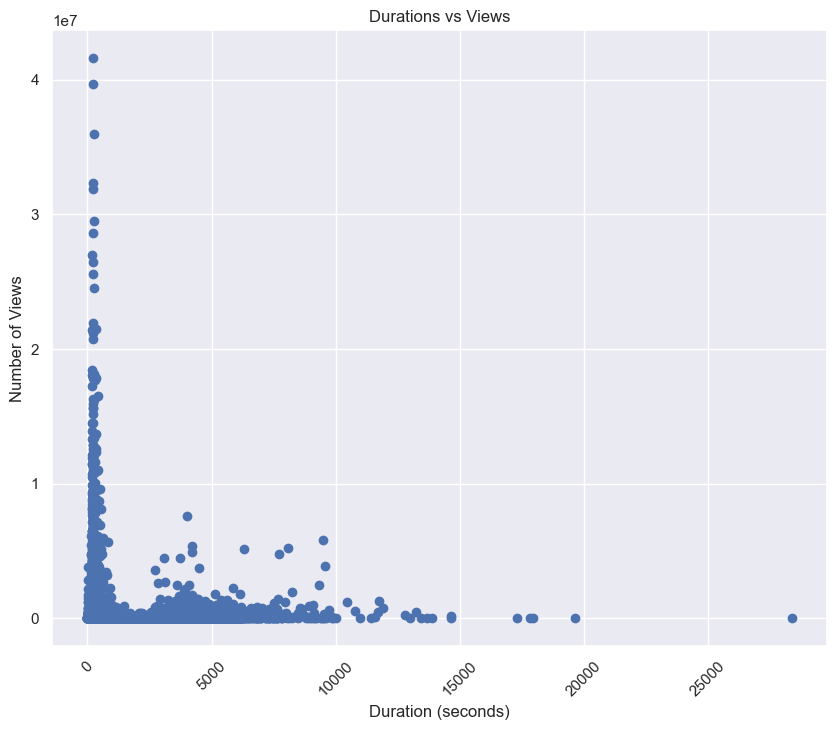

In [19]:
plt.scatter(dataframe['durationSecs'], dataframe['viewCount'])
plt.title('Durations vs Views')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.show()

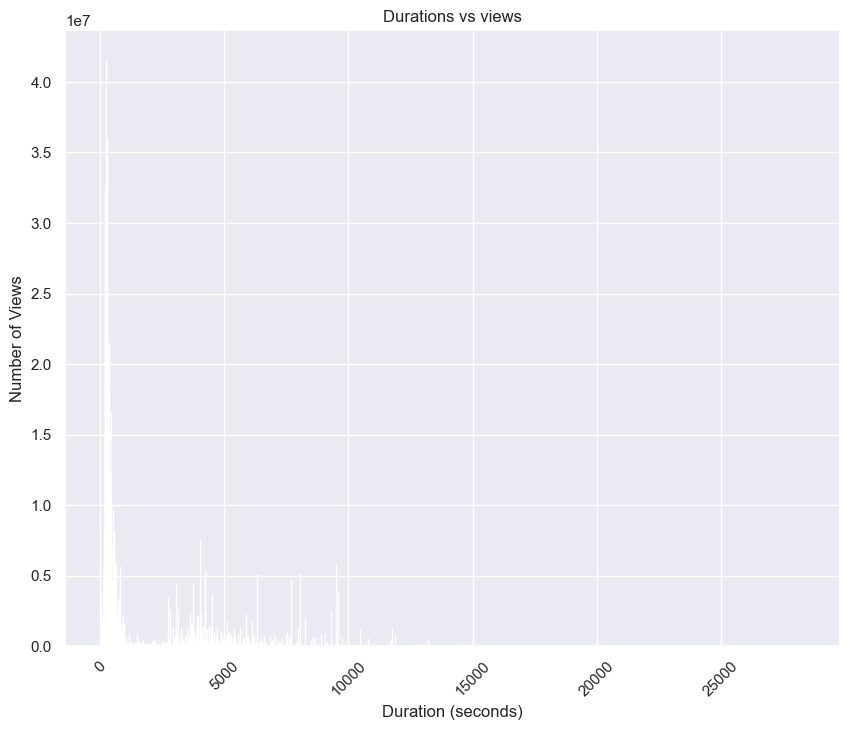

In [15]:
plt.bar(dataframe['durationSecs'], dataframe['viewCount'])
plt.title('Durations vs views')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.show()

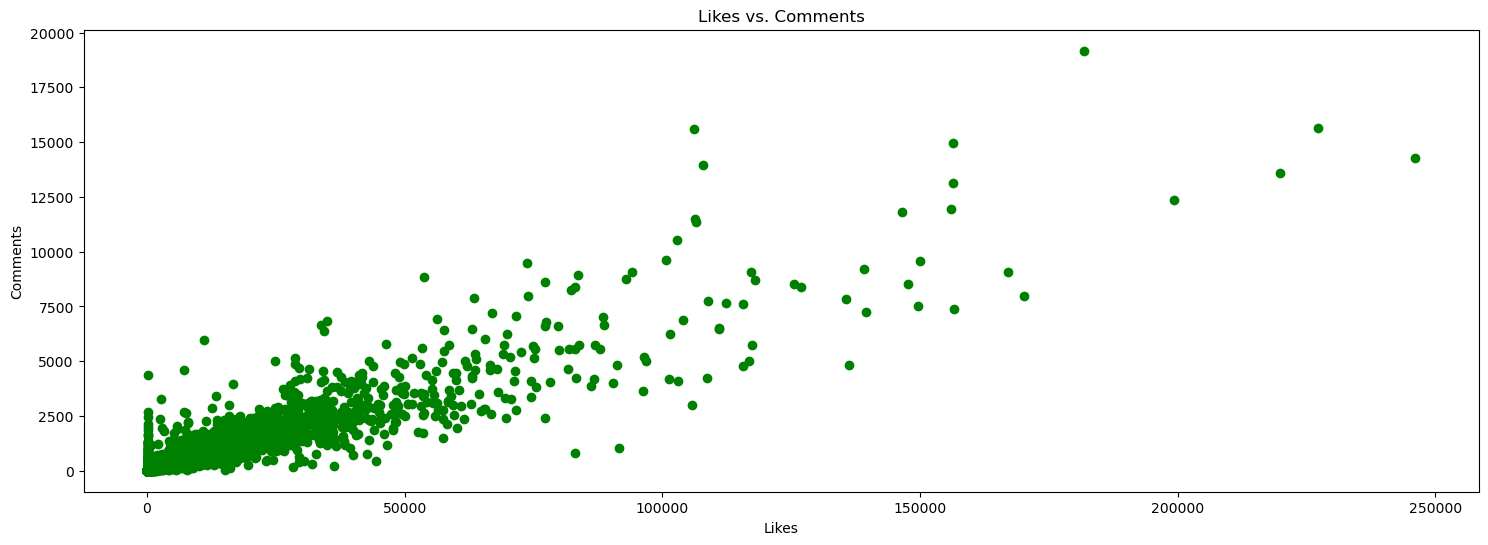

In [94]:
#engagement metrics
plt.scatter(dataframe['likeCount'], dataframe['commentCount'], color='green')
plt.title('Likes vs. Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()

positive correlation between likes and comments count; the points trend upwards with a high concentration at the lower point.
The more the likes the more the comments
This means most videos have a relatively low likes and comments given the concentration of points

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

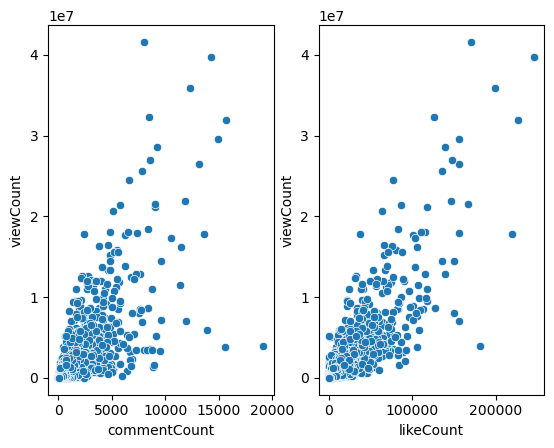

In [7]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = dataframe, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = dataframe, x = "likeCount", y = "viewCount", ax=ax[1])

<AxesSubplot:xlabel='likeRatio', ylabel='viewCount'>

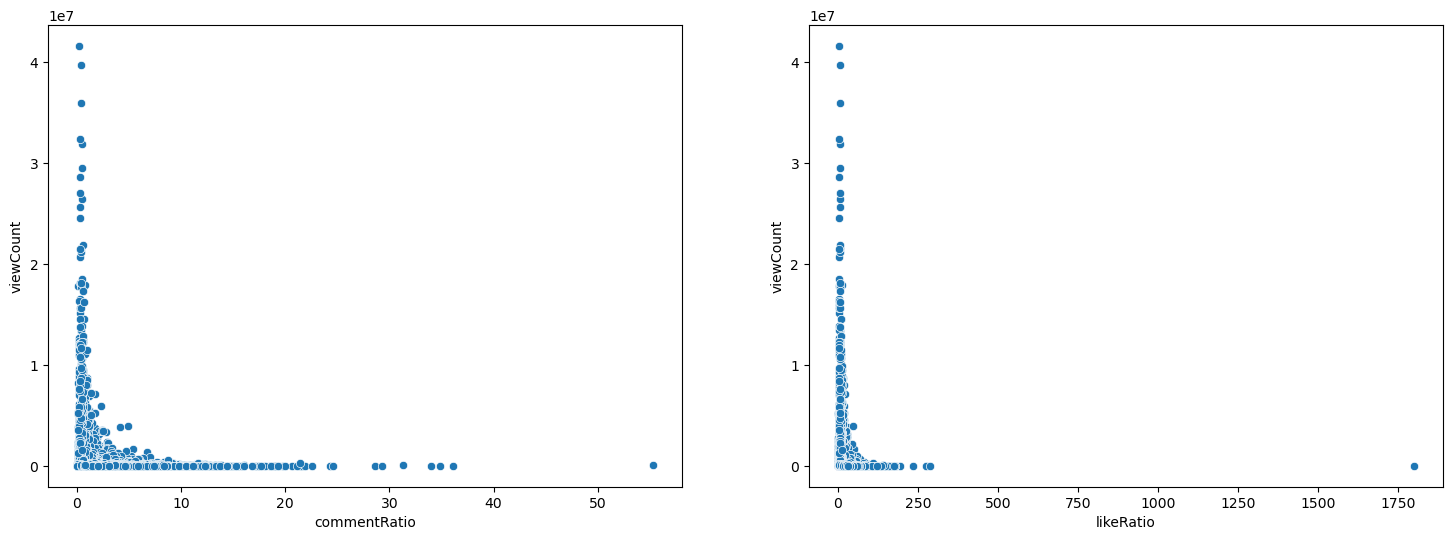

In [103]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = dataframe, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = dataframe, x = "likeRatio", y = "viewCount", ax=ax[1])

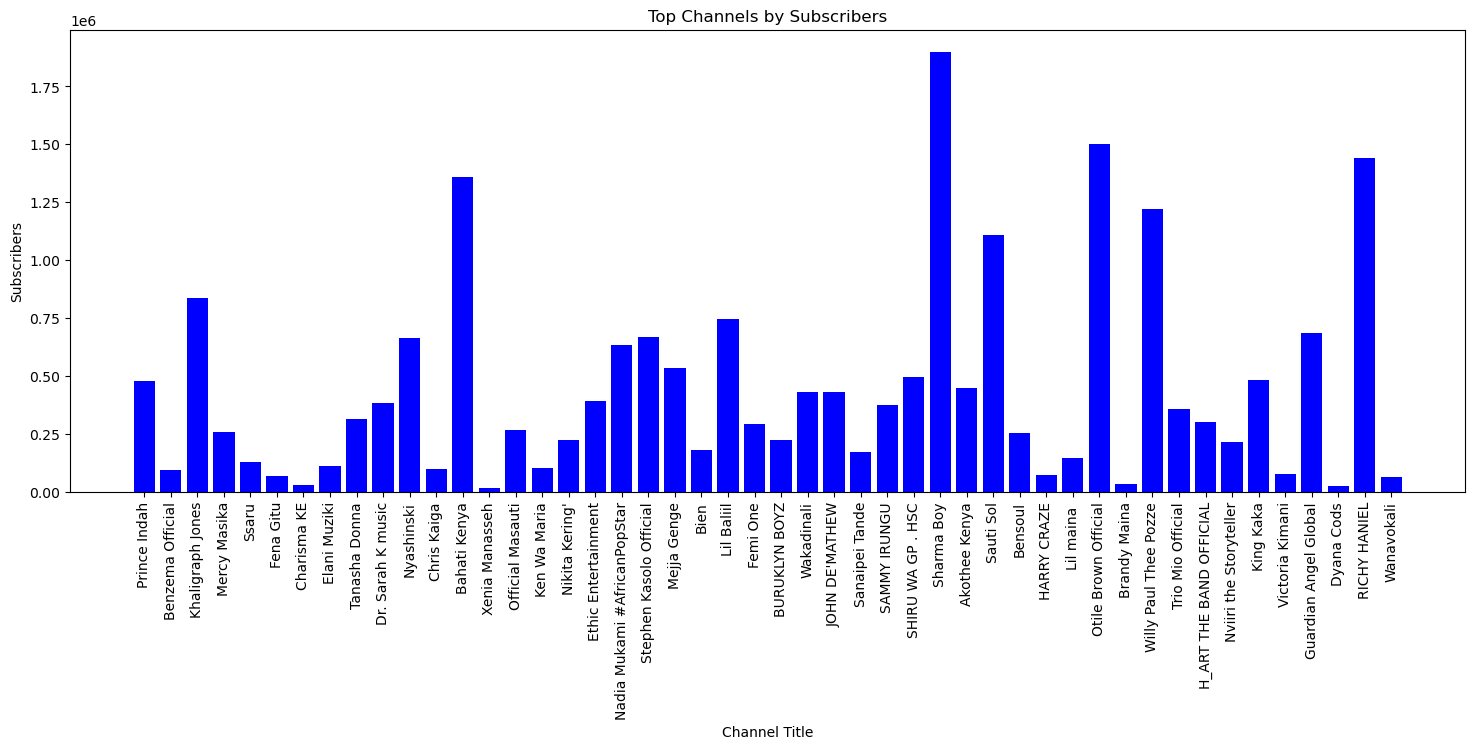

In [106]:
plt.bar(dataframe['channelTitle'], dataframe['subscribers'], color='blue')
plt.title('Top Channels by Subscribers')
plt.xlabel('Channel Title')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)
plt.show()

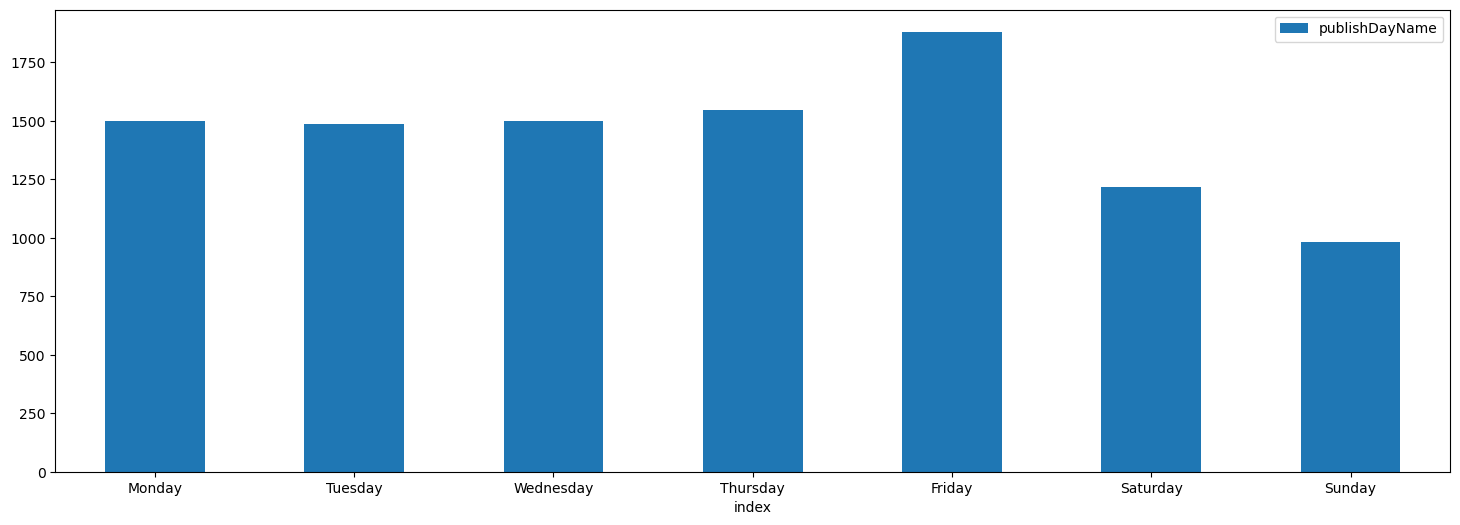

In [107]:
day_df = pd.DataFrame(dataframe['publishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='publishDayName', rot=0)

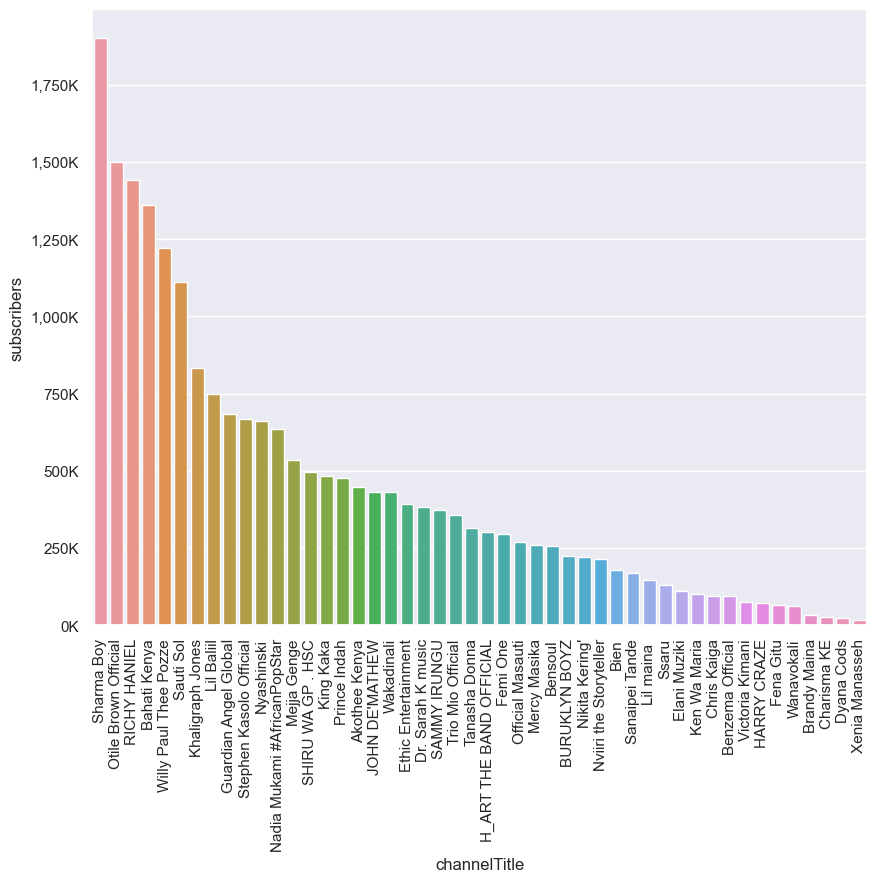

In [11]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channelTitle', y='subscribers', data=dataframe.sort_values('subscribers', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()